In [132]:
from os import listdir
from os.path import isfile, join

import json

from collections import defaultdict

import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [488]:
names = {
    'sausages': [
        'dagK43.txt',
    #     'dagE8.txt',
        # 'dagK46.txt',
    #     'dagO36.txt',
    #     'dagA15.txt',
    #     'dagF13.txt',
    #     'dagR56.txt',
    #     'dagPN37.txt',
    ],

    'testing_graphs': [
        # 'gapgap2_big.txt',
        'gapgap2_big2.txt',
        # 'gapgap2_even_bigger.txt',
        # 'gapgap2_even_bigger_and_correct.txt',
        # 'gapgap2_2_3.txt',
        # 'nice_graph.txt',
        # 'Larry2.txt',
        # 'Larry3.txt',
        # 'Larry3_inv.txt',
        'trans.txt',
        'uber_gan.txt',
        'uber_gan_heavy.txt',
        'sputnik.txt'
    ],
}

data_dirs = [
    r'./results/greed/weighted/{}',
    r'./results/greed/unweighted/{}',
    r'./results/metis/weighted/{}',
    r'./results/metis/unweighted/{}',
    r'./results/GAP_metis/weighted/{}',
    r'./results/GAP_metis/unweighted/{}',
    r'./results/GAP_greed/weighted/{}',
    r'./results/GAP_greed/unweighted/{}',
    r'./results/GAP/{}',
    r'./results/GAP_initial/{}',

    r'./results/GAP2_metis/weighted/{}',
    r'./results/GAP2_metis/unweighted/{}',
    r'./results/GAP2_greed/weighted/{}',
    r'./results/GAP2_greed/unweighted/{}',
    r'./results/GAP2/{}',
]

In [489]:
def parse_line(line: str, n: int) -> list:
    match n:
        case 6:
            # HEADERS = [
            #     'graph',
            #     'physical_graph',
            #     'PENALTY',
            #     'cut_ratio',
            #     'cut_ratio_limitation',
            #     'f',
            #     'partition',
            # ]
            graph, physical_graph, Penalty, cut_ratio, cut_ratio_limitation, f, partition = line.split(maxsplit=n)
            cut_ratio = float(cut_ratio)
            Penalty = bool(Penalty)
            cut_ratio_limitation = float(cut_ratio_limitation)
            f = float(f)

            return (graph, physical_graph, cut_ratio, Penalty, cut_ratio_limitation, f, partition)
        case 8:
            # HEADERS = [
            #     'graph',
            #     'physical_graph',
            #     'P_mut',
            #     'ITER_MAX',
            #     'cut_ratio',
            #     'Penalty',
            #     'cut_ratio_limitation',
            #     'f',
            #     'partition',
            # ]
            graph, physical_graph, P_mut, ITER_MAX, cut_ratio, Penalty, cut_ratio_limitation, f, partition = line.split(maxsplit=n)
            P_mut = float(P_mut)
            ITER_MAX = int(ITER_MAX)
            cut_ratio = float(cut_ratio)
            Penalty = bool(Penalty)
            cut_ratio_limitation = float(cut_ratio_limitation)
            f = float(f)

            return (graph, physical_graph, P_mut, ITER_MAX, cut_ratio, Penalty, cut_ratio_limitation, f, partition)

In [497]:
def read_data() -> dict:
    data = defaultdict(lambda: defaultdict(lambda: defaultdict(list)))

    for input_dir in data_dirs:
        for data_name in names:
            for graph_name in names[data_name]:
                path = input_dir.format(f'{data_name}/{graph_name}')
                # if 'GAP' in path:
                    # print(path)
                if isfile(path):
                    with open(path, 'r') as file:
                        lines = file.readlines()
                        for line in lines:
                            if 'GAP_initial' in input_dir:
                                data[data_name]['genetic_initial'][graph_name].append(
                                    parse_line(line, n=8)
                                )
                            elif 'GAP2_metis/weighted' in input_dir:
                                data[data_name]['genetic2_metis_weighted'][graph_name].append(
                                    parse_line(line, n=8)
                                )
                            elif 'GAP2_metis/unweighted' in input_dir:
                                data[data_name]['genetic2_metis_unweighted'][graph_name].append(
                                    parse_line(line, n=8)
                                )
                            elif 'GAP2_greed/weighted' in input_dir:
                                data[data_name]['genetic2_greed_weighted'][graph_name].append(
                                    parse_line(line, n=8)
                                )
                            elif 'GAP2_greed/unweighted' in input_dir:
                                data[data_name]['genetic2_greed_unweighted'][graph_name].append(
                                    parse_line(line, n=8)
                                )
                            elif 'GAP2/' in input_dir:
                                data[data_name]['GAP2'][graph_name].append(
                                    parse_line(line, n=8)
                                )
                            elif 'GAP_metis/weighted' in input_dir:
                                data[data_name]['genetic_metis_weighted'][graph_name].append(
                                    parse_line(line, n=8)
                                )
                            elif 'GAP_metis/unweighted' in input_dir:
                                data[data_name]['genetic_metis_unweighted'][graph_name].append(
                                    parse_line(line, n=8)
                                )
                            elif 'GAP_greed/weighted' in input_dir:
                                data[data_name]['genetic_greed_weighted'][graph_name].append(
                                    parse_line(line, n=8)
                                )
                            elif 'GAP_greed/unweighted' in input_dir:
                                data[data_name]['genetic_greed_unweighted'][graph_name].append(
                                    parse_line(line, n=8)
                                )
                            elif 'GAP/' in input_dir:
                                data[data_name]['GAP'][graph_name].append(
                                    parse_line(line, n=8)
                                )
                            elif 'greed' in input_dir:
                                if 'unweighted' in input_dir:
                                    data[data_name]['greed_unweighted'][graph_name].append(
                                        parse_line(line, n=6)
                                    )
                                else:
                                    data[data_name]['greed_weighted'][graph_name].append(
                                        parse_line(line, n=6)
                                    )
                            elif 'metis' in input_dir:
                                if 'unweighted' in input_dir:
                                    data[data_name]['metis_unweighted'][graph_name].append(
                                        parse_line(line, n=6)
                                    )
                                else:
                                    data[data_name]['metis_weighted'][graph_name].append(
                                        parse_line(line, n=6)
                                    )
    return data

data = read_data()
print(data)

defaultdict(<function read_data.<locals>.<lambda> at 0x7fbe7dc43a60>, {'sausages': defaultdict(<function read_data.<locals>.<lambda>.<locals>.<lambda> at 0x7fbe84245760>, {'greed_weighted': defaultdict(<class 'list'>, {'dagG33.txt': [('dagG33.txt', '3_2x1correct.txt', 0.04918032786885246, True, 0.07, 1107.0, '[1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1] \n'), ('dagG33.txt', '3_2x1correct.txt', 0.09836065573770492, True, 0.1, 1034.0, '[1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1] \n'), ('dagG33.txt', '3_2x1correct.txt', 0.13934426229508196, True, 0.14, 652.5, '[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

In [507]:
def f(i):
    global BIG_NUMBER
    return list(map(lambda x: min(BIG_NUMBER + 1, round(x)), i))

[('gapgap2_big2.txt', '3_2x1correct.txt', 0.07, 50, 0.058712121212121215, True, 0.07, 1660.0, '[1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1] \n'), ('gapgap2_big2.txt', '3_2x1correct.txt', 0.07, 50, 0.19128787878787878, True, 0.2, 1250.0, '[0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] \n'), ('gapgap2_big2.txt', '3_2x1correct.txt', 0.07, 50, 0.058712121212121215, True, 0.07, 1660.0, '[1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1] \n'), ('gapgap2_big2.txt', '3_2x1correct.txt', 0.07, 50, 0.1893939393939394, True, 0.2, 1250.0, '[0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 

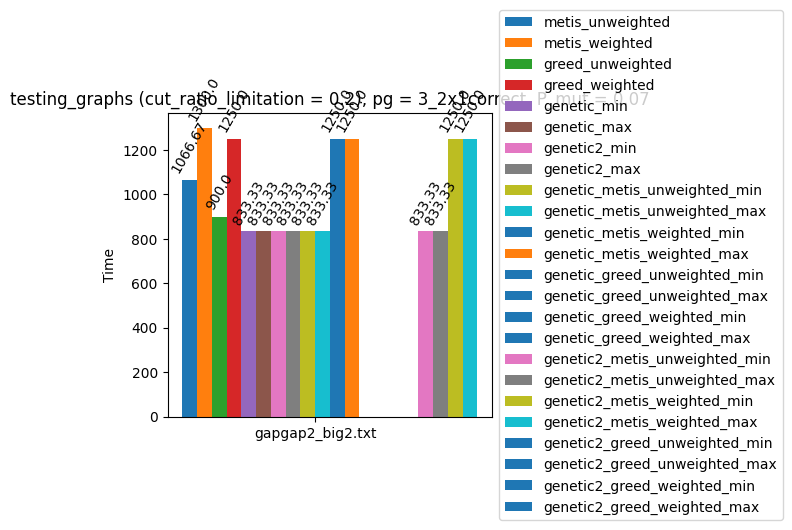

In [480]:
# x = np.arange(len(names['sausages']))  # the label locations
data = read_data()
# BIG_NUMBER = 1200
data_name = 'testing_graphs'
# data_name = 'sausages'
# data_name = 'dagK43.txt'
x_labels = []
cut_ratio_limitation = 0.2
P_mut = 0.07
# physical_graph = '1234x1.txt'
physical_graph = '3_2x1correct.txt'

greed_weighted = []
greed_unweighted = []
metis_weighted = []
metis_unweighted = []
genetic_min = []
genetic_max = []
genetic_metis_weighted_min = []
genetic_metis_weighted_max = []
genetic_metis_unweighted_min = []
genetic_metis_unweighted_max = []

genetic_greed_weighted_min = []
genetic_greed_weighted_max = []
genetic_greed_unweighted_min = []
genetic_greed_unweighted_max = []

genetic2_min = []
genetic2_max = []
genetic2_metis_weighted_min = []
genetic2_metis_weighted_max = []
genetic2_metis_unweighted_min = []
genetic2_metis_unweighted_max = []

genetic2_greed_weighted_min = []
genetic2_greed_weighted_max = []
genetic2_greed_unweighted_min = []
genetic2_greed_unweighted_max = []

for algorithm_name in data[data_name]:
    for graph_name in data[data_name][algorithm_name]:
        x_labels.append(graph_name)
    break

for algorithm_name in data[data_name]:
    if algorithm_name == 'greed_weighted':
        for graph_name in data[data_name][algorithm_name]:
            for i in range(len(data[data_name][algorithm_name][graph_name])):
                # print(data[data_name][algorithm_name][graph_name][i], '<-')
                if cut_ratio_limitation == data[data_name][algorithm_name][graph_name][i][4] and\
                        physical_graph == data[data_name][algorithm_name][graph_name][i][1]:
                    greed_weighted.append(
                        data[data_name][algorithm_name][graph_name][i][-2]
                    )
                    break
    elif algorithm_name == 'greed_unweighted':
        for graph_name in data[data_name][algorithm_name]:
            for i in range(len(data[data_name][algorithm_name][graph_name])):
                # print
                if cut_ratio_limitation == data[data_name][algorithm_name][graph_name][i][4] and\
                        physical_graph == data[data_name][algorithm_name][graph_name][i][1]:
                    greed_unweighted.append(
                        data[data_name][algorithm_name][graph_name][i][-2]
                    )
                    break
    elif algorithm_name == 'GAP':
        for graph_name in data[data_name][algorithm_name]:
            f_vals = []
            for i in range(len(data[data_name][algorithm_name][graph_name])):
                if cut_ratio_limitation == data[data_name][algorithm_name][graph_name][i][6] and\
                        physical_graph == data[data_name][algorithm_name][graph_name][i][1] and\
                        P_mut == data[data_name][algorithm_name][graph_name][i][2]:
                    f_vals.append(
                        data[data_name][algorithm_name][graph_name][i][-2]
                    )
            assert len(f_vals), (data_name, algorithm_name, graph_name)
            genetic_min.append(
                min(f_vals)
            )
            genetic_max.append(
                max(f_vals)
            )
    elif algorithm_name == 'GAP2':
        for graph_name in data[data_name][algorithm_name]:
            f_vals = []
            for i in range(len(data[data_name][algorithm_name][graph_name])):
                if cut_ratio_limitation == data[data_name][algorithm_name][graph_name][i][6] and\
                        physical_graph == data[data_name][algorithm_name][graph_name][i][1] and\
                        P_mut == data[data_name][algorithm_name][graph_name][i][2]:
                    f_vals.append(
                        data[data_name][algorithm_name][graph_name][i][-2]
                    )
            assert len(f_vals), (data_name, algorithm_name, graph_name)
            genetic2_min.append(
                min(f_vals)
            )
            genetic2_max.append(
                max(f_vals)
            )
    elif algorithm_name == 'genetic_metis_weighted':
        for graph_name in data[data_name][algorithm_name]:
            f_vals = []
            for i in range(len(data[data_name][algorithm_name][graph_name])):
                if cut_ratio_limitation == data[data_name][algorithm_name][graph_name][i][6] and\
                        physical_graph == data[data_name][algorithm_name][graph_name][i][1] and\
                        P_mut == data[data_name][algorithm_name][graph_name][i][2]:
                    f_vals.append(
                        data[data_name][algorithm_name][graph_name][i][-2]
                    )
            
            print(data[data_name][algorithm_name][graph_name])

            assert len(f_vals), (data_name, algorithm_name, graph_name)
            genetic_metis_weighted_min.append(
                min(f_vals)
            )
            genetic_metis_weighted_max.append(
                max(f_vals)
            )
    elif algorithm_name == 'genetic2_metis_weighted':
        for graph_name in data[data_name][algorithm_name]:
            f_vals = []
            for i in range(len(data[data_name][algorithm_name][graph_name])):
                if cut_ratio_limitation == data[data_name][algorithm_name][graph_name][i][6] and\
                        physical_graph == data[data_name][algorithm_name][graph_name][i][1] and\
                        P_mut == data[data_name][algorithm_name][graph_name][i][2]:
                    f_vals.append(
                        data[data_name][algorithm_name][graph_name][i][-2]
                    )
            
            print(data[data_name][algorithm_name][graph_name])
            print(f_vals)
            

            assert len(f_vals), (data_name, algorithm_name, graph_name)
            genetic2_metis_weighted_min.append(
                min(f_vals)
            )
            genetic2_metis_weighted_max.append(
                max(f_vals)
            )
    elif algorithm_name == 'genetic_metis_unweighted':
        for graph_name in data[data_name][algorithm_name]:
            f_vals = []
            for i in range(len(data[data_name][algorithm_name][graph_name])):
                if cut_ratio_limitation == data[data_name][algorithm_name][graph_name][i][6] and\
                        physical_graph == data[data_name][algorithm_name][graph_name][i][1] and\
                        P_mut == data[data_name][algorithm_name][graph_name][i][2]:
                    f_vals.append(
                        data[data_name][algorithm_name][graph_name][i][-2]
                    )
            assert len(f_vals), (data_name, algorithm_name, graph_name)
            genetic_metis_unweighted_min.append(
                min(f_vals)
            )
            genetic_metis_unweighted_max.append(
                max(f_vals)
            )
    elif algorithm_name == 'genetic2_metis_unweighted':
        for graph_name in data[data_name][algorithm_name]:
            f_vals = []
            for i in range(len(data[data_name][algorithm_name][graph_name])):
                if cut_ratio_limitation == data[data_name][algorithm_name][graph_name][i][6] and\
                        physical_graph == data[data_name][algorithm_name][graph_name][i][1] and\
                        P_mut == data[data_name][algorithm_name][graph_name][i][2]:
                    f_vals.append(
                        data[data_name][algorithm_name][graph_name][i][-2]
                    )
            assert len(f_vals), (data_name, algorithm_name, graph_name)
            genetic2_metis_unweighted_min.append(
                min(f_vals)
            )
            genetic2_metis_unweighted_max.append(
                max(f_vals)
            )
    elif algorithm_name == 'genetic2_greed_weighted':
        for graph_name in data[data_name][algorithm_name]:
            f_vals = []
            for i in range(len(data[data_name][algorithm_name][graph_name])):
                if cut_ratio_limitation == data[data_name][algorithm_name][graph_name][i][6] and\
                        physical_graph == data[data_name][algorithm_name][graph_name][i][1] and\
                        P_mut == data[data_name][algorithm_name][graph_name][i][2]:
                    f_vals.append(
                        data[data_name][algorithm_name][graph_name][i][-2]
                    )
            assert len(f_vals), (data_name, algorithm_name, graph_name)
            genetic2_greed_weighted_min.append(
                min(f_vals)
            )
            genetic2_greed_weighted_max.append(
                max(f_vals)
            )
            # print(f_vals)
    elif algorithm_name == 'genetic_greed_weighted':
        for graph_name in data[data_name][algorithm_name]:
            f_vals = []
            for i in range(len(data[data_name][algorithm_name][graph_name])):
                if cut_ratio_limitation == data[data_name][algorithm_name][graph_name][i][6] and\
                        physical_graph == data[data_name][algorithm_name][graph_name][i][1] and\
                        P_mut == data[data_name][algorithm_name][graph_name][i][2]:
                    f_vals.append(
                        data[data_name][algorithm_name][graph_name][i][-2]
                    )
            assert len(f_vals), (data_name, algorithm_name, graph_name)
            genetic_greed_weighted_min.append(
                min(f_vals)
            )
            genetic_greed_weighted_max.append(
                max(f_vals)
            )
            # print(f_vals)
    elif algorithm_name == 'genetic_greed_unweighted':
        for graph_name in data[data_name][algorithm_name]:
            f_vals = []
            for i in range(len(data[data_name][algorithm_name][graph_name])):
                if cut_ratio_limitation == data[data_name][algorithm_name][graph_name][i][6] and\
                        physical_graph == data[data_name][algorithm_name][graph_name][i][1] and\
                        P_mut == data[data_name][algorithm_name][graph_name][i][2]:
                    f_vals.append(
                        data[data_name][algorithm_name][graph_name][i][-2]
                    )
            assert len(f_vals), (data_name, algorithm_name, graph_name)
            genetic_greed_unweighted_min.append(
                min(f_vals)
            )
            genetic_greed_unweighted_max.append(
                max(f_vals)
            )
    elif algorithm_name == 'genetic2_greed_unweighted':
        for graph_name in data[data_name][algorithm_name]:
            f_vals = []
            for i in range(len(data[data_name][algorithm_name][graph_name])):
                if cut_ratio_limitation == data[data_name][algorithm_name][graph_name][i][6] and\
                        physical_graph == data[data_name][algorithm_name][graph_name][i][1] and\
                        P_mut == data[data_name][algorithm_name][graph_name][i][2]:
                    f_vals.append(
                        data[data_name][algorithm_name][graph_name][i][-2]
                    )
            assert len(f_vals), (data_name, algorithm_name, graph_name)
            genetic2_greed_unweighted_min.append(
                min(f_vals)
            )
            genetic2_greed_unweighted_max.append(
                max(f_vals)
            )
    elif algorithm_name == 'metis_unweighted':
        for graph_name in data[data_name][algorithm_name]:
            for i in range(len(data[data_name][algorithm_name][graph_name])):
                # print(data[data_name][algorithm_name][graph_name][i], '<-')
                if cut_ratio_limitation == data[data_name][algorithm_name][graph_name][i][4] and\
                        physical_graph == data[data_name][algorithm_name][graph_name][i][1]:
                    metis_unweighted.append(
                        data[data_name][algorithm_name][graph_name][i][-2]
                    )
                    break
    elif algorithm_name == 'metis_weighted':
        for graph_name in data[data_name][algorithm_name]:
            for i in range(len(data[data_name][algorithm_name][graph_name])):
                # print(data[data_name][algorithm_name][graph_name][i], '<-')
                if cut_ratio_limitation == data[data_name][algorithm_name][graph_name][i][4] and\
                        physical_graph == data[data_name][algorithm_name][graph_name][i][1]:
                    metis_weighted.append(
                        data[data_name][algorithm_name][graph_name][i][-2]
                    )
                    break


all_val = genetic2_min + genetic2_max + genetic_min + genetic_max +\
    genetic2_greed_unweighted_min + genetic2_greed_unweighted_max +\
    genetic2_greed_weighted_min + genetic2_greed_weighted_max +\
    genetic_greed_unweighted_min + genetic_greed_unweighted_max +\
    genetic_greed_weighted_min + genetic_greed_weighted_max +\
    genetic2_metis_unweighted_min + genetic2_metis_unweighted_max +\
    genetic2_metis_weighted_min + genetic2_metis_weighted_max +\
    genetic_metis_unweighted_min + genetic_metis_unweighted_max +\
    genetic_metis_weighted_min + genetic_metis_weighted_max +\
    greed_unweighted + greed_weighted +\
    metis_unweighted + metis_weighted

all_val = list(filter(lambda x: x <1e10, all_val))
BIG_NUMBER = int(max(all_val) * 1.2)

genetic_max = f(genetic_max)
genetic_min = f(genetic_min)

genetic2_max = f(genetic2_max)
genetic2_min = f(genetic2_min)

greed_weighted = f(greed_weighted)
greed_unweighted = f(greed_unweighted)
metis_weighted = f(metis_weighted)
metis_unweighted = f(metis_unweighted)

genetic_metis_unweighted_min = f(genetic_metis_unweighted_min)
genetic_metis_unweighted_max = f(genetic_metis_unweighted_max)
genetic_metis_weighted_min = f(genetic_metis_weighted_min)
genetic_metis_weighted_max = f(genetic_metis_weighted_max)

genetic_greed_weighted_min = f(genetic_greed_weighted_min )
genetic_greed_weighted_max = f(genetic_greed_weighted_max )
genetic_greed_unweighted_min = f(genetic_greed_unweighted_min)
genetic_greed_unweighted_max = f(genetic_greed_unweighted_max)

genetic2_metis_unweighted_min = f(genetic2_metis_unweighted_min)
genetic2_metis_unweighted_max = f(genetic2_metis_unweighted_max)
genetic2_metis_weighted_min = f(genetic2_metis_weighted_min)
genetic2_metis_weighted_max = f(genetic2_metis_weighted_max)

genetic2_greed_weighted_min = f(genetic2_greed_weighted_min )
genetic2_greed_weighted_max = f(genetic2_greed_weighted_max )
genetic2_greed_unweighted_min = f(genetic2_greed_unweighted_min)
genetic2_greed_unweighted_max = f(genetic2_greed_unweighted_max)

print('---------')

print(genetic_max)
print(genetic_min)
print(greed_weighted)
print(greed_unweighted)
print(metis_weighted)
print(metis_unweighted)
print(genetic_metis_unweighted_min)
print(genetic_metis_unweighted_max)
print(genetic_metis_weighted_min)
print(genetic_metis_weighted_max)

print(genetic_greed_unweighted_min)
print(genetic_greed_unweighted_max)
print(genetic_greed_weighted_min)
print(genetic_greed_weighted_max)

print(genetic2_metis_unweighted_min)
print(genetic2_metis_unweighted_max)
print(genetic2_metis_weighted_min)
print(genetic2_metis_weighted_max)

print(genetic2_greed_unweighted_min)
print(genetic2_greed_unweighted_max)
print(genetic2_greed_weighted_min)
print(genetic2_greed_weighted_max)

title = data_name + f' (cut_ratio_limitation = {cut_ratio_limitation}), pg = {physical_graph.split(".")[0]}, P_mut = {P_mut}'

width = 2  # the width of the bars
x = 30*width*np.arange(len(x_labels))  # the label locations

fig, ax = plt.subplots()
fig.set_figheight(5)
fig.set_figwidth(len(x_labels)*5)

rects1 = ax.bar(x - 17*width/2, metis_unweighted, width, label='metis_unweighted')
rects2 = ax.bar(x - 15*width/2, metis_weighted, width, label='metis_weighted')
rects3 = ax.bar(x - 13*width/2, greed_unweighted, width, label='greed_unweighted')
rects4 = ax.bar(x - 11*width/2, greed_weighted, width, label='greed_weighted')
rects5 = ax.bar(x - 9*width/2, genetic_min, width, label='genetic_min')
rects6 = ax.bar(x - 7*width/2, genetic_max, width, label='genetic_max')
rects7 = ax.bar(x - 5*width/2, genetic2_min, width, label='genetic2_min')
rects8 = ax.bar(x - 3*width/2, genetic2_max, width, label='genetic2_max')
rects9 = ax.bar(x - 1*width/2, genetic_metis_unweighted_min, width, label='genetic_metis_unweighted_min')
rects10 = ax.bar(x + 1*width/2, genetic_metis_unweighted_max, width, label='genetic_metis_unweighted_max')
rects11 = ax.bar(x + 3*width/2, genetic_metis_weighted_min, width, label='genetic_metis_weighted_min')
rects12 = ax.bar(x + 5*width/2, genetic_metis_weighted_max, width, label='genetic_metis_weighted_max')

rects13 = ax.bar(x + 7*width/2, genetic_greed_unweighted_min, width, label='genetic_greed_unweighted_min')
rects14 = ax.bar(x + 9*width/2, genetic_greed_unweighted_max, width, label='genetic_greed_unweighted_max')
rects15 = ax.bar(x + 11*width/2, genetic_greed_weighted_min, width, label='genetic_greed_weighted_min')
rects16 = ax.bar(x + 13*width/2, genetic_greed_weighted_max, width, label='genetic_greed_weighted_max')

rects17 = ax.bar(x + 15*width/2, genetic2_metis_unweighted_min, width, label='genetic2_metis_unweighted_min')
rects18 = ax.bar(x + 17*width/2, genetic2_metis_unweighted_max, width, label='genetic2_metis_unweighted_max')
rects19 = ax.bar(x + 19*width/2, genetic2_metis_weighted_min, width, label='genetic2_metis_weighted_min')
rects20 = ax.bar(x + 21*width/2, genetic2_metis_weighted_max, width, label='genetic2_metis_weighted_max')

rects21 = ax.bar(x + 23*width/2, genetic2_greed_unweighted_min, width, label='genetic2_greed_unweighted_min')
rects22 = ax.bar(x + 25*width/2, genetic2_greed_unweighted_max, width, label='genetic2_greed_unweighted_max')
rects23 = ax.bar(x + 27*width/2, genetic2_greed_weighted_min, width, label='genetic2_greed_weighted_min')
rects24 = ax.bar(x + 29*width/2, genetic2_greed_weighted_max, width, label='genetic2_greed_weighted_max')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Time')
ax.set_title(title)
ax.set_xticks(x)
ax.set_xticklabels(x_labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()

        ax.annotate('{}'.format('∞' if height > BIG_NUMBER else height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom',
                    rotation = 0 if height > BIG_NUMBER else 60
        )


autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)
autolabel(rects5)
autolabel(rects6)
autolabel(rects7)
autolabel(rects8)
autolabel(rects9)
autolabel(rects10)
autolabel(rects11)
autolabel(rects12)
autolabel(rects13)
autolabel(rects14)
autolabel(rects15)
autolabel(rects16)
autolabel(rects17)
autolabel(rects18)
autolabel(rects19)
autolabel(rects20)
autolabel(rects21)
autolabel(rects22)
autolabel(rects23)
autolabel(rects24)

fig.tight_layout()
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

[('dagG33.txt', '3_2x1correct.txt', 0.07, 50, 0.06967213114754098, True, 0.07, 1104.0, '[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1] \n'), ('dagG33.txt', '3_2x1correct.txt', 0.07, 50, 0.1885245901639344, True, 0.2, 469.6666666666667, '[1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] \n'), ('dagG33.txt', '3_2x1correct.txt', 0.07, 50, 0.06557377049180328, True, 0.07, 1093.0, '[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

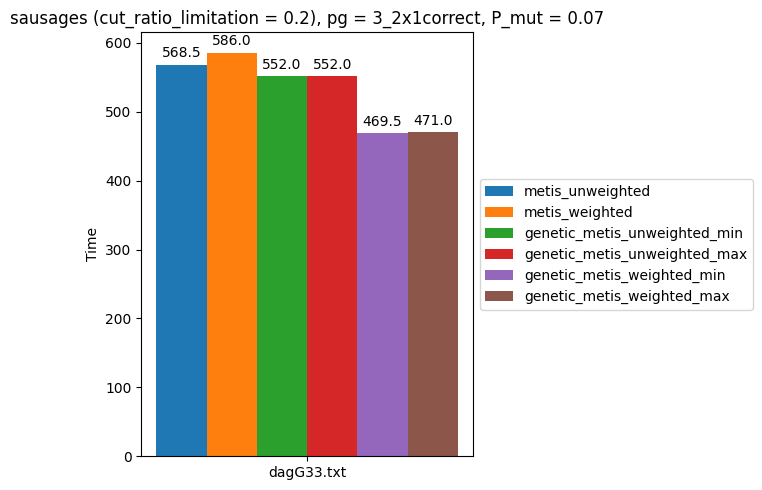

In [461]:
# ПЕРВЫЙ СЛАЙД 1
# x = np.arange(len(names['sausages']))  # the label locations

names = {
    'sausages': [
        # 'dagA15.txt',
        # 'dagA7.txt',
        # 'dagA11.txt',
        # 'dagA14.txt',
        # 'dagA15.txt',
        # 'dagA20.txt',
        # 'dagE8.txt',
        # 'dagF13.txt',
        # 'dagK43.txt',
        # 'dagK46.txt',
        # 'dagN37.txt',
        # 'dagO36.txt',
        # 'dagR56.txt',
        # 'dagJ57.txt',
        # 'dagJ45.txt',
        # 'dagE35.txt',
        # 'dagC19.txt',
        # 'dagD13.txt',
        # 'dagD20.txt',
        # 'dagD30.txt',
        # 'dagD33.txt',
        # 'dagP65.txt',
        # 'dagR56.txt',
        # 'dagH14.txt',
        # 'dagI30.txt',
        'dagG33.txt',
        # 'dagP65.txt',
    ],

    'testing_graphs': [
        # 'gapgap2_big.txt',
        # 'gapgap2_big2.txt',
        # 'gapgap2_even_bigger.txt',
        'gapgap2_even_bigger_and_correct.txt',
        # 'gapgap2_2_3.txt',
        'nice_graph.txt',
        # 'Larry2.txt',
        # 'Larry3.txt',
        # 'Larry3_inv.txt',
        'trans.txt',
        'uber_gan.txt',
        'uber_gan_heavy.txt',
        # 'sputnik.txt'
    ],
}

data = read_data()
# BIG_NUMBER = 1200
data_name = 'testing_graphs'
data_name = 'sausages'
# data_name = 'dagK43.txt'
x_labels = []
cut_ratio_limitation = 0.2
P_mut = 0.07
# physical_graph = '1234x1.txt'
physical_graph = '3_2x1correct.txt'

metis_weighted = []
metis_unweighted = []

genetic_metis_weighted_min = []
genetic_metis_weighted_max = []
genetic_metis_unweighted_min = []
genetic_metis_unweighted_max = []

for algorithm_name in data[data_name]:
    for graph_name in data[data_name][algorithm_name]:
        x_labels.append(graph_name)
    break

for algorithm_name in data[data_name]:
    if algorithm_name == 'genetic_metis_weighted':
        for graph_name in data[data_name][algorithm_name]:
            f_vals = []
            for i in range(len(data[data_name][algorithm_name][graph_name])):
                if cut_ratio_limitation == data[data_name][algorithm_name][graph_name][i][6] and\
                        physical_graph == data[data_name][algorithm_name][graph_name][i][1] and\
                        P_mut == data[data_name][algorithm_name][graph_name][i][2]:
                    f_vals.append(
                        data[data_name][algorithm_name][graph_name][i][-2]
                    )
            
            print(data[data_name][algorithm_name][graph_name])

            assert len(f_vals), (data_name, algorithm_name, graph_name)
            genetic_metis_weighted_min.append(
                min(f_vals)
            )
            genetic_metis_weighted_max.append(
                max(f_vals)
            )
    elif algorithm_name == 'genetic_metis_unweighted':
        for graph_name in data[data_name][algorithm_name]:
            f_vals = []
            for i in range(len(data[data_name][algorithm_name][graph_name])):
                if cut_ratio_limitation == data[data_name][algorithm_name][graph_name][i][6] and\
                        physical_graph == data[data_name][algorithm_name][graph_name][i][1] and\
                        P_mut == data[data_name][algorithm_name][graph_name][i][2]:
                    f_vals.append(
                        data[data_name][algorithm_name][graph_name][i][-2]
                    )
            assert len(f_vals), (data_name, algorithm_name, graph_name)
            genetic_metis_unweighted_min.append(
                min(f_vals)
            )
            genetic_metis_unweighted_max.append(
                max(f_vals)
            )
    elif algorithm_name == 'metis_unweighted':
        for graph_name in data[data_name][algorithm_name]:
            for i in range(len(data[data_name][algorithm_name][graph_name])):
                # print(data[data_name][algorithm_name][graph_name][i], '<-')
                if cut_ratio_limitation == data[data_name][algorithm_name][graph_name][i][4] and\
                        physical_graph == data[data_name][algorithm_name][graph_name][i][1]:
                    metis_unweighted.append(
                        data[data_name][algorithm_name][graph_name][i][-2]
                    )
                    break
    elif algorithm_name == 'metis_weighted':
        for graph_name in data[data_name][algorithm_name]:
            for i in range(len(data[data_name][algorithm_name][graph_name])):
                # print(data[data_name][algorithm_name][graph_name][i], '<-')
                if cut_ratio_limitation == data[data_name][algorithm_name][graph_name][i][4] and\
                        physical_graph == data[data_name][algorithm_name][graph_name][i][1]:
                    metis_weighted.append(
                        data[data_name][algorithm_name][graph_name][i][-2]
                    )
                    break


all_val = genetic2_min + genetic2_max + genetic_min + genetic_max +\
    genetic2_greed_unweighted_min + genetic2_greed_unweighted_max +\
    genetic2_greed_weighted_min + genetic2_greed_weighted_max +\
    genetic_greed_unweighted_min + genetic_greed_unweighted_max +\
    genetic_greed_weighted_min + genetic_greed_weighted_max +\
    genetic2_metis_unweighted_min + genetic2_metis_unweighted_max +\
    genetic2_metis_weighted_min + genetic2_metis_weighted_max +\
    genetic_metis_unweighted_min + genetic_metis_unweighted_max +\
    genetic_metis_weighted_min + genetic_metis_weighted_max +\
    greed_unweighted + greed_weighted +\
    metis_unweighted + metis_weighted

all_val = list(filter(lambda x: x <1e10, all_val))
BIG_NUMBER = int(max(all_val) * 1.4)


metis_weighted = f(metis_weighted)
metis_unweighted = f(metis_unweighted)

genetic_metis_unweighted_min = f(genetic_metis_unweighted_min)
genetic_metis_unweighted_max = f(genetic_metis_unweighted_max)
genetic_metis_weighted_min = f(genetic_metis_weighted_min)
genetic_metis_weighted_max = f(genetic_metis_weighted_max)

print('---------')

print(metis_weighted)
print(metis_unweighted)
print(genetic_metis_unweighted_min)
print(genetic_metis_unweighted_max)
print(genetic_metis_weighted_min)
print(genetic_metis_weighted_max)

title = data_name + f' (cut_ratio_limitation = {cut_ratio_limitation}), pg = {physical_graph.split(".")[0]}, P_mut = {P_mut}'

width = 2  # the width of the bars
x = 10*width*np.arange(len(x_labels))  # the label locations

fig, ax = plt.subplots()
fig.set_figheight(5)
fig.set_figwidth(len(x_labels)*5)

rects1 = ax.bar(x - 5*width/2, metis_unweighted, width, label='metis_unweighted')
rects2 = ax.bar(x - 3*width/2, metis_weighted, width, label='metis_weighted')
rects3 = ax.bar(x - 1*width/2, genetic_metis_unweighted_min, width, label='genetic_metis_unweighted_min')
rects4 = ax.bar(x + 1*width/2, genetic_metis_unweighted_max, width, label='genetic_metis_unweighted_max')
rects5 = ax.bar(x + 3*width/2, genetic_metis_weighted_min, width, label='genetic_metis_weighted_min')
rects6 = ax.bar(x + 5*width/2, genetic_metis_weighted_max, width, label='genetic_metis_weighted_max')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Time')
ax.set_title(title)
ax.set_xticks(x)
ax.set_xticklabels(x_labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()

        ax.annotate('{}'.format('∞' if height > BIG_NUMBER else height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom',
                    rotation = 0
        )


autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)
autolabel(rects5)
autolabel(rects6)

fig.tight_layout()
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

---------
[1494]
[1067]
[1033]
[1494]
[1494]
[1494]
[1494]
[1033]
[1033]
[1033]
[1033]


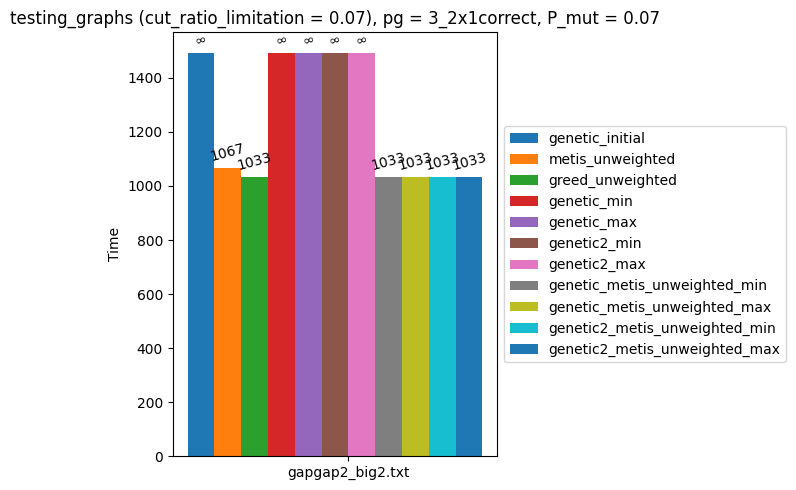

In [538]:
# ПЕРВЫЙ СЛАЙД 2
# x = np.arange(len(names['sausages']))  # the label locations

names = {
    'sausages': [
        # 'dagA15.txt',
        # 'dagA7.txt',
        # 'dagA11.txt',
        # 'dagA14.txt',
        # 'dagA15.txt',
        # 'dagA20.txt',
        # 'dagE8.txt',
        # 'dagF13.txt',
        # 'dagK43.txt',
        # 'dagK46.txt',
        # 'dagN37.txt',
        # 'dagO36.txt',
        # 'dagR56.txt',
        # 'dagJ57.txt',
        # 'dagJ45.txt',
        # 'dagE35.txt',
        # 'dagC19.txt',
        # 'dagD13.txt',
        # 'dagD20.txt',
        # 'dagD30.txt',
        # 'dagD33.txt',
        # 'dagP65.txt',
        # 'dagR56.txt',
        # 'dagH14.txt',
        # 'dagI30.txt',
        'dagG33.txt',
        # 'dagP65.txt',
    ],

    'testing_graphs': [
        # 'gapgap2_big.txt',
        'gapgap2_big2.txt',
        # 'gapgap2_even_bigger.txt',
        # 'gapgap2_even_bigger_and_correct.txt',
        # 'gapgap2_big2.txt',
        # 'gapgap2_2_3.txt',
        # 'nice_graph.txt',
        'Larry2.txt',
        # 'Larry3.txt',
        # 'Larry3_inv.txt',
        # 'Larry3_inv.txt',
        # 'trans.txt',
        # 'uber_gan.txt',
        # 'uber_gan_heavy.txt',
        'sputnik.txt'
    ],
}

data = read_data()
# BIG_NUMBER = 1200
data_name = 'testing_graphs'
# data_name = 'sausages'
# data_name = 'dagK43.txt'
x_labels = []
cut_ratio_limitation = 0.07
P_mut = 0.07
# physical_graph = '1234x1.txt'
physical_graph = '3_2x1correct.txt'

greed_weighted = []
greed_unweighted = []
metis_weighted = []
metis_unweighted = []
genetic_min = []
genetic_max = []
genetic_metis_weighted_min = []
genetic_metis_weighted_max = []
genetic_metis_unweighted_min = []
genetic_metis_unweighted_max = []

genetic_greed_weighted_min = []
genetic_greed_weighted_max = []
genetic_greed_unweighted_min = []
genetic_greed_unweighted_max = []

genetic2_min = []
genetic2_max = []
genetic2_metis_weighted_min = []
genetic2_metis_weighted_max = []
genetic2_metis_unweighted_min = []
genetic2_metis_unweighted_max = []

genetic2_greed_weighted_min = []
genetic2_greed_weighted_max = []
genetic2_greed_unweighted_min = []
genetic2_greed_unweighted_max = []

genetic_initial = []

for algorithm_name in data[data_name]:
    for graph_name in data[data_name][algorithm_name]:
        x_labels.append(graph_name)
    break

# print(list(data.keys()))

for algorithm_name in data[data_name]:
    # print(algorithm_name)
    if algorithm_name == 'greed_unweighted':
        for graph_name in data[data_name][algorithm_name]:
            for i in range(len(data[data_name][algorithm_name][graph_name])):
                # print
                if cut_ratio_limitation == data[data_name][algorithm_name][graph_name][i][4] and\
                        physical_graph == data[data_name][algorithm_name][graph_name][i][1]:
                    greed_unweighted.append(
                        data[data_name][algorithm_name][graph_name][i][-2]
                    )
                    break
    elif algorithm_name == 'genetic_initial':
        for graph_name in data[data_name][algorithm_name]:
            # print('ok')
            for i in range(len(data[data_name][algorithm_name][graph_name])):
                # print(data[data_name][algorithm_name][graph_name][i], '<-')
                if cut_ratio_limitation == data[data_name][algorithm_name][graph_name][i][6] and\
                        physical_graph == data[data_name][algorithm_name][graph_name][i][1]:
                    genetic_initial.append(
                        data[data_name][algorithm_name][graph_name][i][-2]
                    )
                    break
    elif algorithm_name == 'GAP':
        for graph_name in data[data_name][algorithm_name]:
            f_vals = []
            for i in range(len(data[data_name][algorithm_name][graph_name])):
                if cut_ratio_limitation == data[data_name][algorithm_name][graph_name][i][6] and\
                        physical_graph == data[data_name][algorithm_name][graph_name][i][1] and\
                        P_mut == data[data_name][algorithm_name][graph_name][i][2]:
                    f_vals.append(
                        data[data_name][algorithm_name][graph_name][i][-2]
                    )
            assert len(f_vals), (data_name, algorithm_name, graph_name)
            genetic_min.append(
                min(f_vals)
            )
            genetic_max.append(
                max(f_vals)
            )
    elif algorithm_name == 'GAP2':
        for graph_name in data[data_name][algorithm_name]:
            f_vals = []
            for i in range(len(data[data_name][algorithm_name][graph_name])):
                if cut_ratio_limitation == data[data_name][algorithm_name][graph_name][i][6] and\
                        physical_graph == data[data_name][algorithm_name][graph_name][i][1] and\
                        P_mut == data[data_name][algorithm_name][graph_name][i][2]:
                    f_vals.append(
                        data[data_name][algorithm_name][graph_name][i][-2]
                    )
            assert len(f_vals), (data_name, algorithm_name, graph_name)
            genetic2_min.append(
                min(f_vals)
            )
            genetic2_max.append(    
                max(f_vals)
            )
    elif algorithm_name == 'genetic_metis_unweighted':
        for graph_name in data[data_name][algorithm_name]:
            f_vals = []
            for i in range(len(data[data_name][algorithm_name][graph_name])):
                if cut_ratio_limitation == data[data_name][algorithm_name][graph_name][i][6] and\
                        physical_graph == data[data_name][algorithm_name][graph_name][i][1] and\
                        P_mut == data[data_name][algorithm_name][graph_name][i][2]:
                    f_vals.append(
                        data[data_name][algorithm_name][graph_name][i][-2]
                    )
            assert len(f_vals), (data_name, algorithm_name, graph_name)
            genetic_metis_unweighted_min.append(
                min(f_vals)
            )
            genetic_metis_unweighted_max.append(
                max(f_vals)
            )
    elif algorithm_name == 'genetic2_metis_unweighted':
        for graph_name in data[data_name][algorithm_name]:
            f_vals = []
            for i in range(len(data[data_name][algorithm_name][graph_name])):
                if cut_ratio_limitation == data[data_name][algorithm_name][graph_name][i][6] and\
                        physical_graph == data[data_name][algorithm_name][graph_name][i][1] and\
                        P_mut == data[data_name][algorithm_name][graph_name][i][2]:
                    f_vals.append(
                        data[data_name][algorithm_name][graph_name][i][-2]
                    )
            assert len(f_vals), (data_name, algorithm_name, graph_name)
            genetic2_metis_unweighted_min.append(
                min(f_vals)
            )
            genetic2_metis_unweighted_max.append(
                max(f_vals)
            )
    elif algorithm_name == 'metis_unweighted':
        for graph_name in data[data_name][algorithm_name]:
            for i in range(len(data[data_name][algorithm_name][graph_name])):
                # print(data[data_name][algorithm_name][graph_name][i], '<-')
                if cut_ratio_limitation == data[data_name][algorithm_name][graph_name][i][4] and\
                        physical_graph == data[data_name][algorithm_name][graph_name][i][1]:
                    metis_unweighted.append(
                        data[data_name][algorithm_name][graph_name][i][-2]
                    )
                    break


all_val = genetic2_min + genetic2_max + genetic_min + genetic_max +\
    genetic2_greed_unweighted_min + genetic2_greed_unweighted_max +\
    genetic2_greed_weighted_min + genetic2_greed_weighted_max +\
    genetic_greed_unweighted_min + genetic_greed_unweighted_max +\
    genetic_greed_weighted_min + genetic_greed_weighted_max +\
    genetic2_metis_unweighted_min + genetic2_metis_unweighted_max +\
    genetic2_metis_weighted_min + genetic2_metis_weighted_max +\
    genetic_metis_unweighted_min + genetic_metis_unweighted_max +\
    genetic_metis_weighted_min + genetic_metis_weighted_max +\
    greed_unweighted + greed_weighted +\
    metis_unweighted + metis_weighted

# print(genetic_initial)

all_val = list(filter(lambda x: x < 1e10, all_val))
BIG_NUMBER = int(max(all_val) * 1.4)


genetic_initial = f(genetic_initial)

metis_unweighted = f(metis_unweighted)
greed_unweighted = f(greed_unweighted)

genetic_min = f(genetic_min)
genetic_max = f(genetic_max)

genetic2_min = f(genetic2_min)
genetic2_max = f(genetic2_max)

genetic_metis_unweighted_min = f(genetic_metis_unweighted_min)
genetic_metis_unweighted_max = f(genetic_metis_unweighted_max)

genetic2_metis_unweighted_min = f(genetic2_metis_unweighted_min)
genetic2_metis_unweighted_max = f(genetic2_metis_unweighted_max)

print('---------')

print(genetic_initial)
print(metis_unweighted)
print(greed_unweighted)

print(genetic_min)
print(genetic_max)

print(genetic2_min)
print(genetic2_max)

print(genetic_metis_unweighted_min)
print(genetic_metis_unweighted_max)

print(genetic2_metis_unweighted_min)
print(genetic2_metis_unweighted_max)


title = data_name + f' (cut_ratio_limitation = {cut_ratio_limitation}), pg = {physical_graph.split(".")[0]}, P_mut = {P_mut}'

width = 2  # the width of the bars
x = 10*width*np.arange(len(x_labels))  # the label locations

fig, ax = plt.subplots()
fig.set_figheight(5)
fig.set_figwidth(len(x_labels)*5)

rects0 = ax.bar(x - 11*width/2, genetic_initial, width, label='genetic_initial')
rects1 = ax.bar(x - 9*width/2, metis_unweighted, width, label='metis_unweighted')
rects2 = ax.bar(x - 7*width/2, greed_unweighted, width, label='greed_unweighted')
rects3 = ax.bar(x - 5*width/2, genetic_min, width, label='genetic_min')
rects4 = ax.bar(x - 3*width/2, genetic_max, width, label='genetic_max')
rects5 = ax.bar(x - 1*width/2, genetic2_min, width, label='genetic2_min')
rects6 = ax.bar(x + 1*width/2, genetic2_max, width, label='genetic2_max')
rects7 = ax.bar(x + 3*width/2, genetic_metis_unweighted_min, width, label='genetic_metis_unweighted_min')
rects8 = ax.bar(x + 5*width/2, genetic_metis_unweighted_max, width, label='genetic_metis_unweighted_max')
rects9 = ax.bar(x + 7*width/2, genetic2_metis_unweighted_min, width, label='genetic2_metis_unweighted_min')
rects10 = ax.bar(x + 9*width/2, genetic2_metis_unweighted_max, width, label='genetic2_metis_unweighted_max')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Time')
ax.set_title(title)
ax.set_xticks(x)
ax.set_xticklabels(x_labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()

        ax.annotate('{}'.format('∞' if height > BIG_NUMBER else height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom',
                    rotation = 15
        )


autolabel(rects0)
autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)
autolabel(rects5)
autolabel(rects6)
autolabel(rects7)
autolabel(rects8)
autolabel(rects9)
autolabel(rects10)

fig.tight_layout()
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

In [17]:
labels = ['G1', 'G2', 'G3', 'G4', 'G5']
men_means = [20, 34, 30, 35, 27]
women_means = [25, 32, 34, 20, 25]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars



In [18]:
import networkx as nx

In [19]:
def input_networkx_graph_from_file(path: str) -> nx.Graph:
    G = nx.Graph()
    with open(path, 'r') as f:
        for line in f.readlines()[1:]:
            name, size, *children = map(int, line.strip().split())
            name = int(name)
            children = list(map(int, children))
            G.add_node(name, weight=size)
            G.add_edges_from((name, child) for child in children)
    G.graph['node_weight_attr'] = 'weight'
    
    return G

In [274]:
graph = input_networkx_graph_from_file('./data/testing_graphs/testing_metis.txt')
part = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0]
print(graph.nodes)
# print(*enumerate(part))
for pos, node in enumerate(graph.nodes):
    graph.nodes[node]['color'] = 'r' if part[pos] else 'b'
colors = nx.get_node_attributes(graph,'color').values()
print(colors)

[0, 17, 16, 1, 18, 2, 19, 3, 20, 4, 21, 5, 22, 6, 23, 7, 24, 8, 25, 9, 26, 10, 27, 11, 28, 12, 29, 13, 30, 14, 31, 15, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63]
dict_values(['r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b'])


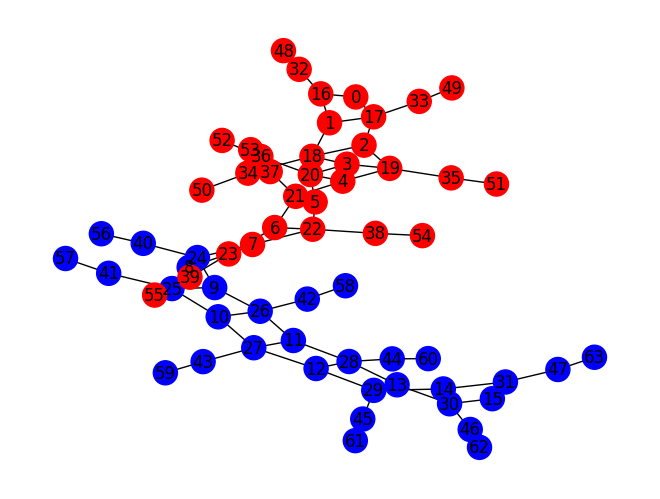

In [276]:
pos = nx.spring_layout(graph)
nx.draw(graph, node_color=colors, with_labels = True)

---------
[416]
[337]
[356]
[416]
[335]
[335]


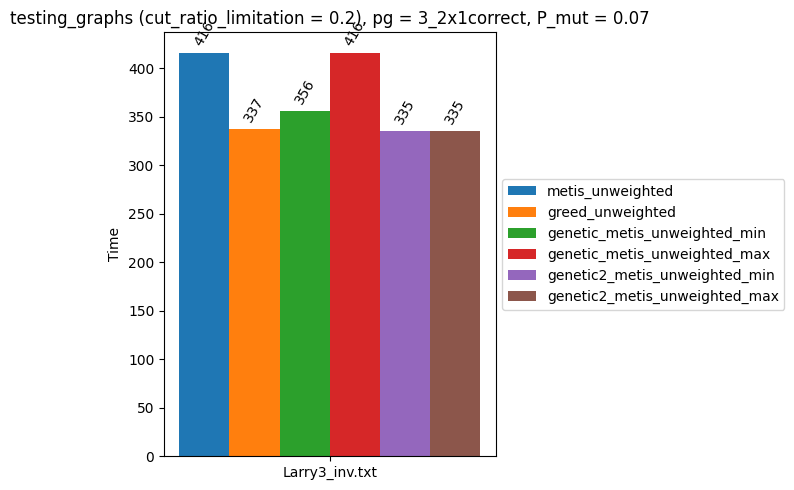

In [528]:
# x = np.arange(len(names['sausages']))  # the label locations
data = read_data()

names = {
    'sausages': [
        'dagA15.txt',
        # 'dagA7.txt',
        # 'dagA11.txt',
        # 'dagA14.txt',
        # 'dagA15.txt',
        # 'dagA20.txt',
        # 'dagE8.txt',
        # 'dagF13.txt',
        # 'dagK43.txt',
        # 'dagK46.txt',
        # 'dagN37.txt',
        # 'dagO36.txt',
        # 'dagR56.txt',
        # 'dagJ57.txt',
        # 'dagJ45.txt',
        # 'dagE35.txt',
        # 'dagC19.txt',
        # 'dagD13.txt',
        # 'dagD20.txt',
        # 'dagD30.txt',
        # 'dagD33.txt',
        # 'dagP65.txt',
        # 'dagR56.txt',
        # 'dagH14.txt',
        # 'dagI30.txt',
        # 'dagG33.txt',
        # 'dagP65.txt',
    ],

    'testing_graphs': [
        # 'gapgap2_big.txt',
        # 'gapgap2_big2.txt',
        # 'gapgap2_even_bigger.txt',
        # 'gapgap2_even_bigger_and_correct.txt',
        # 'gapgap2_big2.txt',
        # 'gapgap2_2_3.txt',
        # 'nice_graph.txt',
        # 'Larry2.txt',
        # 'Larry3.txt',
        'Larry3_inv.txt',
        # 'Larry3_inv.txt',
        # 'trans.txt',
        # 'uber_gan.txt',
        # 'uber_gan_heavy.txt',
        # 'sputnik.txt'
    ],
}

# BIG_NUMBER = 1200
data_name = 'testing_graphs'
# data_name = 'sausages'
# data_name = 'dagK43.txt'
x_labels = []
cut_ratio_limitation = 0.2
P_mut = 0.07
# physical_graph = '1234x1.txt'
physical_graph = '3_2x1correct.txt'

greed_unweighted = []
metis_unweighted = []
genetic_metis_unweighted_min = []
genetic_metis_unweighted_max = []

genetic2_metis_unweighted_min = []
genetic2_metis_unweighted_max = []

for algorithm_name in data[data_name]:
    for graph_name in data[data_name][algorithm_name]:
        x_labels.append(graph_name)
    break

for algorithm_name in data[data_name]:
    if algorithm_name == 'greed_unweighted':
        for graph_name in data[data_name][algorithm_name]:
            for i in range(len(data[data_name][algorithm_name][graph_name])):
                # print
                if cut_ratio_limitation == data[data_name][algorithm_name][graph_name][i][4] and\
                        physical_graph == data[data_name][algorithm_name][graph_name][i][1]:
                    greed_unweighted.append(
                        data[data_name][algorithm_name][graph_name][i][-2]
                    )
                    break
    elif algorithm_name == 'genetic_metis_unweighted':
        for graph_name in data[data_name][algorithm_name]:
            f_vals = []
            for i in range(len(data[data_name][algorithm_name][graph_name])):
                if cut_ratio_limitation == data[data_name][algorithm_name][graph_name][i][6] and\
                        physical_graph == data[data_name][algorithm_name][graph_name][i][1] and\
                        P_mut == data[data_name][algorithm_name][graph_name][i][2]:
                    f_vals.append(
                        data[data_name][algorithm_name][graph_name][i][-2]
                    )
            assert len(f_vals), (data_name, algorithm_name, graph_name)
            genetic_metis_unweighted_min.append(
                min(f_vals)
            )
            genetic_metis_unweighted_max.append(
                max(f_vals)
            )
    elif algorithm_name == 'genetic2_metis_unweighted':
        for graph_name in data[data_name][algorithm_name]:
            f_vals = []
            for i in range(len(data[data_name][algorithm_name][graph_name])):
                if cut_ratio_limitation == data[data_name][algorithm_name][graph_name][i][6] and\
                        physical_graph == data[data_name][algorithm_name][graph_name][i][1] and\
                        P_mut == data[data_name][algorithm_name][graph_name][i][2]:
                    f_vals.append(
                        data[data_name][algorithm_name][graph_name][i][-2]
                    )
            assert len(f_vals), (data_name, algorithm_name, graph_name)
            genetic2_metis_unweighted_min.append(
                min(f_vals)
            )
            genetic2_metis_unweighted_max.append(
                max(f_vals)
            )
    elif algorithm_name == 'metis_unweighted':
        for graph_name in data[data_name][algorithm_name]:
            for i in range(len(data[data_name][algorithm_name][graph_name])):
                # print(data[data_name][algorithm_name][graph_name][i], '<-')
                if cut_ratio_limitation == data[data_name][algorithm_name][graph_name][i][4] and\
                        physical_graph == data[data_name][algorithm_name][graph_name][i][1]:
                    metis_unweighted.append(
                        data[data_name][algorithm_name][graph_name][i][-2]
                    )
                    break


all_val = genetic2_min + genetic2_max + genetic_min + genetic_max +\
    genetic2_greed_unweighted_min + genetic2_greed_unweighted_max +\
    genetic2_greed_weighted_min + genetic2_greed_weighted_max +\
    genetic_greed_unweighted_min + genetic_greed_unweighted_max +\
    genetic_greed_weighted_min + genetic_greed_weighted_max +\
    genetic2_metis_unweighted_min + genetic2_metis_unweighted_max +\
    genetic2_metis_weighted_min + genetic2_metis_weighted_max +\
    genetic_metis_unweighted_min + genetic_metis_unweighted_max +\
    genetic_metis_weighted_min + genetic_metis_weighted_max +\
    greed_unweighted + greed_weighted +\
    metis_unweighted + metis_weighted

all_val = list(filter(lambda x: x <1e10, all_val))
BIG_NUMBER = int(max(all_val) * 1.2)

greed_unweighted = f(greed_unweighted)
metis_unweighted = f(metis_unweighted)

genetic_metis_unweighted_min = f(genetic_metis_unweighted_min)
genetic_metis_unweighted_max = f(genetic_metis_unweighted_max)

genetic2_metis_unweighted_min = f(genetic2_metis_unweighted_min)
genetic2_metis_unweighted_max = f(genetic2_metis_unweighted_max)

print('---------')

print(metis_unweighted)

print(greed_unweighted)

print(genetic_metis_unweighted_min)
print(genetic_metis_unweighted_max)

print(genetic2_metis_unweighted_min)
print(genetic2_metis_unweighted_max)

title = data_name + f' (cut_ratio_limitation = {cut_ratio_limitation}), pg = {physical_graph.split(".")[0]}, P_mut = {P_mut}'

width = 2  # the width of the bars
x = 30*width*np.arange(len(x_labels))  # the label locations

fig, ax = plt.subplots()
fig.set_figheight(5)
fig.set_figwidth(len(x_labels)*5)

rects1 = ax.bar(x - 5*width/2, metis_unweighted, width, label='metis_unweighted')
rects2 = ax.bar(x - 3*width/2, greed_unweighted, width, label='greed_unweighted')
rects3 = ax.bar(x - 1*width/2, genetic_metis_unweighted_min, width, label='genetic_metis_unweighted_min')
rects4 = ax.bar(x + 1*width/2, genetic_metis_unweighted_max, width, label='genetic_metis_unweighted_max')
rects5 = ax.bar(x + 3*width/2, genetic2_metis_unweighted_min, width, label='genetic2_metis_unweighted_min')
rects6 = ax.bar(x + 5*width/2, genetic2_metis_unweighted_max, width, label='genetic2_metis_unweighted_max')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Time')
ax.set_title(title)
ax.set_xticks(x)
ax.set_xticklabels(x_labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()

        ax.annotate('{}'.format('∞' if height > BIG_NUMBER else height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom',
                    rotation = 0 if height > BIG_NUMBER else 60
        )


autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)
autolabel(rects5)
autolabel(rects6)

fig.tight_layout()
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

---------
[1116]
[1116]
[]
[]
[]
[]


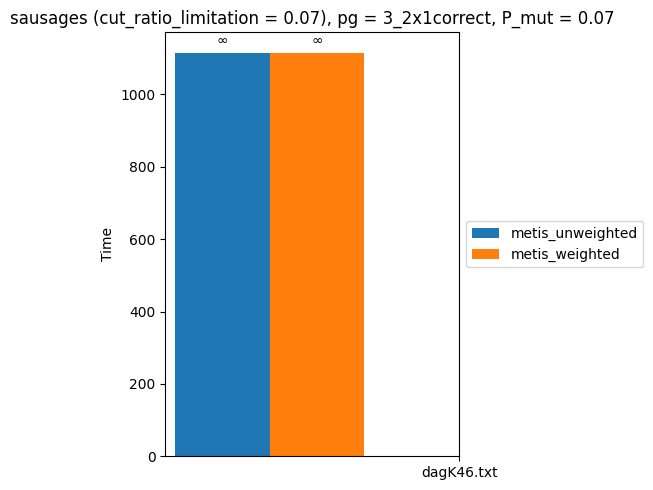

In [420]:

# x = np.arange(len(names['sausages']))  # the label locations

names = {
    'sausages': [
        # 'dagK43.txt',
        # 'dagE8.txt',
        'dagK46.txt',
        # 'dagO36.txt',
        # 'dagA15.txt',
        # 'dagF13.txt',
        # 'dagR56.txt',
        # 'dagPN37.txt',
    ],

    'testing_graphs': [
        # 'gapgap2_big.txt',
        # 'gapgap2_big2.txt',
        # 'gapgap2_even_bigger.txt',
        'gapgap2_even_bigger_and_correct.txt',
        'gapgap2_2_3.txt',
        # 'nice_graph.txt',
        # 'Larry2.txt',
        # 'Larry3.txt',
        # 'Larry3_inv.txt',
        # 'trans.txt',
        # 'uber_gan.txt',
        # 'uber_gan_heavy.txt',
        # 'sputnik.txt'
    ],
}

data = read_data()
# BIG_NUMBER = 1200
# data_name = 'testing_graphs'
data_name = 'sausages'
# data_name = 'dagK43.txt'
x_labels = []
cut_ratio_limitation = 0.07
P_mut = 0.07
# physical_graph = '1234x1.txt'
physical_graph = '3_2x1correct.txt'

metis_weighted = []
metis_unweighted = []

genetic_metis_weighted_min = []
genetic_metis_weighted_max = []
genetic_metis_unweighted_min = []
genetic_metis_unweighted_max = []

for algorithm_name in data[data_name]:
    for graph_name in data[data_name][algorithm_name]:
        x_labels.append(graph_name)
    break

for algorithm_name in data[data_name]:
    if algorithm_name == 'metis_unweighted':
        for graph_name in data[data_name][algorithm_name]:
            for i in range(len(data[data_name][algorithm_name][graph_name])):
                # print(data[data_name][algorithm_name][graph_name][i], '<-')
                if cut_ratio_limitation == data[data_name][algorithm_name][graph_name][i][4] and\
                        physical_graph == data[data_name][algorithm_name][graph_name][i][1]:
                    metis_unweighted.append(
                        data[data_name][algorithm_name][graph_name][i][-2]
                    )
                    break
    elif algorithm_name == 'metis_weighted':
        for graph_name in data[data_name][algorithm_name]:
            for i in range(len(data[data_name][algorithm_name][graph_name])):
                # print(data[data_name][algorithm_name][graph_name][i], '<-')
                if cut_ratio_limitation == data[data_name][algorithm_name][graph_name][i][4] and\
                        physical_graph == data[data_name][algorithm_name][graph_name][i][1]:
                    metis_weighted.append(
                        data[data_name][algorithm_name][graph_name][i][-2]
                    )
                    break


# all_val = genetic2_min + genetic2_max + genetic_min + genetic_max +\
#     genetic2_greed_unweighted_min + genetic2_greed_unweighted_max +\
#     genetic2_greed_weighted_min + genetic2_greed_weighted_max +\
#     genetic_greed_unweighted_min + genetic_greed_unweighted_max +\
#     genetic_greed_weighted_min + genetic_greed_weighted_max +\
#     genetic2_metis_unweighted_min + genetic2_metis_unweighted_max +\
#     genetic2_metis_weighted_min + genetic2_metis_weighted_max +\
#     genetic_metis_unweighted_min + genetic_metis_unweighted_max +\
#     genetic_metis_weighted_min + genetic_metis_weighted_max +\
#     greed_unweighted + greed_weighted +\
#     metis_unweighted + metis_weighted

all_val = list(filter(lambda x: x <1e10, all_val))
BIG_NUMBER = int(max(all_val) * 1.2)


metis_weighted = f(metis_weighted)
metis_unweighted = f(metis_unweighted)

genetic_metis_unweighted_min = f(genetic_metis_unweighted_min)
genetic_metis_unweighted_max = f(genetic_metis_unweighted_max)
genetic_metis_weighted_min = f(genetic_metis_weighted_min)
genetic_metis_weighted_max = f(genetic_metis_weighted_max)

print('---------')

print(metis_weighted)
print(metis_unweighted)
print(genetic_metis_unweighted_min)
print(genetic_metis_unweighted_max)
print(genetic_metis_weighted_min)
print(genetic_metis_weighted_max)

title = data_name + f' (cut_ratio_limitation = {cut_ratio_limitation}), pg = {physical_graph.split(".")[0]}, P_mut = {P_mut}'

width = 2  # the width of the bars
x = 10*width*np.arange(len(x_labels))  # the label locations

fig, ax = plt.subplots()
fig.set_figheight(5)
fig.set_figwidth(len(x_labels)*5)

rects1 = ax.bar(x - 5*width/2, metis_unweighted, width, label='metis_unweighted')
rects2 = ax.bar(x - 3*width/2, metis_weighted, width, label='metis_weighted')
# rects3 = ax.bar(x - 1*width/2, genetic_metis_unweighted_min, width, label='genetic_metis_unweighted_min')
# rects4 = ax.bar(x + 1*width/2, genetic_metis_unweighted_max, width, label='genetic_metis_unweighted_max')
# rects5 = ax.bar(x + 3*width/2, genetic_metis_weighted_min, width, label='genetic_metis_weighted_min')
# rects6 = ax.bar(x + 5*width/2, genetic_metis_weighted_max, width, label='genetic_metis_weighted_max')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Time')
ax.set_title(title)
ax.set_xticks(x)
ax.set_xticklabels(x_labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()

        ax.annotate('{}'.format('∞' if height > BIG_NUMBER else height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom',
                    rotation = 0 if height > BIG_NUMBER else 60
        )


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()